## Confidence Intervals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

coffee_full = pd.read_csv('support-files/11_Confidence-Intervals/coffee_dataset.csv')
coffee_red = coffee_full.sample(200) # this is the only data you might actually get in the real world
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [2]:
drinks_coffee = coffee_red['drinks_coffee'].mean()
drinks_coffee

0.595

In [3]:
dont_drink = 1 - drinks_coffee
dont_drink

0.405

`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [4]:
# average height of individuals who drink coffee 
avg_height_coffee = coffee_red.query('drinks_coffee == True')['height'].mean()
avg_height_coffee

68.11962990858618

In [5]:
# average height of individuals who do not drink coffee
avg_height_not = coffee_red.query('drinks_coffee == False')['height'].mean()
avg_height_not

66.78492279927877

`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [6]:
boot_means = []

for _ in range(200):
    bootsample = coffee_red.sample(200, replace=True)
    boot_means.append(bootsample['drinks_coffee'].mean())

boot_means = np.array(boot_means)
boot_means.mean()

0.5963499999999999

In [7]:
# proportion of not coffee drinkers in bootstrap sample
1 - boot_means.mean()

0.40365000000000006

`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

In [8]:
boot_means = []

for _ in range(int(1e4)):
    bootsample = coffee_red.sample(200, replace=True)
    boot_means.append(bootsample.query('drinks_coffee == False')['height'].mean())

boot_means = np.array(boot_means)

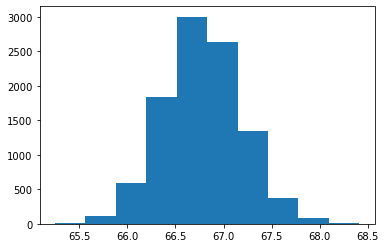

In [9]:
plt.hist(boot_means);

In [10]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(65.99256077021725, 67.582566009168)

`5.`  Did your interval capture the actual average height of non-coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [11]:
# What is the value for the mean height of those who do not drink coffee in your population?
actual_height_mean_nocoff = coffee_full.query('drinks_coffee == False')['height'].mean()
actual_height_mean_nocoff

66.44340776214703

In [12]:
print(f'With 95% confidence, the average height of non-coffee drinkers is between {np.percentile(boot_means, 2.5):.2f} and {np.percentile(boot_means, 97.5):.2f}.')
print(f'Since the average height of the population is {actual_height_mean_nocoff:.2f}, the interval actually captured it.')

With 95% confidence, the average height of non-coffee drinkers is between 65.99 and 67.58.
Since the average height of the population is 66.44, the interval actually captured it.


In [13]:
# example of 99% confidence interval
np.percentile(boot_means, 1), np.percentile(boot_means, 99)

(65.8526116204322, 67.75752917187378)

## Confidence Intervals - Difference in Means

#### Question: What is the difference in the mean height for coffee vs. non-coffee drinkers?

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [14]:
bootsample = coffee_red.sample(200, replace=True)
mean_coff = bootsample.query('drinks_coffee == True')['height'].mean()
mean_nocoff = bootsample.query('drinks_coffee == False')['height'].mean()
mean_coff - mean_nocoff

1.4095377566853386

In [15]:
# iterating 10k times
diff = []

for _ in range(int(1e4)):
    bootsample = coffee_red.sample(200, replace=True)
    mean_coff = bootsample.query('drinks_coffee == True')['height'].mean()
    mean_nocoff = bootsample.query('drinks_coffee == False')['height'].mean()
    diff.append(mean_coff - mean_nocoff)

diff = np.array(diff)

In [16]:
# 99% confidence interval
# statistical evidence coffee drinkers are on average taller
np.percentile(diff, 0.5), np.percentile(diff, 99.5)

(0.0902771292964006, 2.529973949360082)

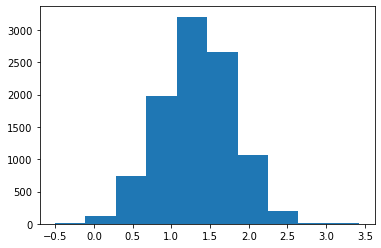

In [17]:
plt.hist(diff);

In [18]:
diff.min()

-0.504403365363217

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

#### Question: What is the difference in the mean heights for individuals older than 21 and those younger than 21?

In [19]:
diff_age = []

for _ in range(int(1e4)):
    bootsample = coffee_red.sample(200, replace=True)
    mean_over21 = bootsample.query('age == ">=21"')['height'].mean()
    mean_under21 = bootsample.query('age == "<21"')['height'].mean()
    diff_age.append(mean_over21 - mean_under21)

diff_age = np.array(diff_age)
np.percentile(diff_age, 0.5), np.percentile(diff_age, 99.5)
# statistical evidence that over21 are on average taller

(3.3683303394302846, 5.139730381451074)

In [20]:
diff_age.min()

2.98587237577442

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

#### Question: What is the difference in the mean heights for coffee drinkers and non-coffee drinkers individuals under 21?

In [21]:
# exploring data
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [22]:
# exploring age column
coffee_red['age'].dtypes

dtype('O')

In [23]:
# exploring age column
coffee_red['age'].unique()

array(['<21', '>=21'], dtype=object)

In [24]:
diff_coff_under21 = []

for _ in range(int(1e4)):
    bootsample = coffee_red.sample(200, replace=True)
    mean_coff_under21 = bootsample.query('drinks_coffee == True and age == "<21"')['height'].mean()
    mean_nocoff_under21 = bootsample.query('drinks_coffee == False and age == "<21"')['height'].mean()
    diff_coff_under21.append(mean_coff_under21 - mean_nocoff_under21)

diff_coff_under21 = np.array(diff_coff_under21)
np.percentile(diff_coff_under21, 2.5), np.percentile(diff_coff_under21, 97.5)
# For the under21 group, we have evidence that the non-coffee drinkers are on average taller

(-2.6258101559245572, -1.0803161381394908)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [25]:
diff_coff_over21 = []

for _ in range(int(1e4)):
    bootsample = coffee_red.sample(200, replace=True)
    mean_coff_over21 = bootsample.query('drinks_coffee == True and age == ">=21"')['height'].mean()
    mean_nocoff_over21 = bootsample.query('drinks_coffee == False and age == ">=21"')['height'].mean()
    diff_coff_over21.append(mean_coff_over21 - mean_nocoff_over21)

diff_coff_over21 = np.array(diff_coff_over21)
np.percentile(diff_coff_over21, 2.5), np.percentile(diff_coff_over21, 97.5)
# For the over21 group, we have evidence that the non-coffee drinks are on average taller

(-4.411992559731178, -1.8287111654654924)

Within the under 21 and over 21 groups, we saw that on average non-coffee drinkers were taller.  But, when combined, we saw that on average coffee drinkers were on average taller.  This is again **Simpson's paradox**, and essentially there are more adults in the dataset who were coffee drinkers.  So these individuals made it seem like coffee drinkers were on average taller - which is a misleading result.  

In [26]:
coffee_red.shape

(200, 4)

In [27]:
coffee_red.query('drinks_coffee == True').shape

(119, 4)

In [28]:
coffee_red.query('drinks_coffee == False').shape

(81, 4)

### Confidence Interval Applications
A/B testing is one of the most important to businesses around the world. In this technique, you are changing something about your web layout to understand how it impacts users. You ideally want to provide a page that leads to more clicks, higher revenue, and/or higher customer satisfaction.

### Statistical vs. Practical Significance
Using confidence intervals and hypothesis testing, you are able to provide **statistical significance** in making decisions.

However, it is also important to take into consideration **practical significance** in making decisions. Practical significance takes into consideration other factors of your situation that might not be considered directly in the results of your hypothesis test or confidence interval. Constraints like **space**, **time**, or **money** are important in business decisions. However, they might not be accounted for directly in a statistical test.

### Traditional Confidence Interval Methods
There are many different Confidence Interval and Hypothesis Tests:

- [T-Test](https://en.wikipedia.org/wiki/Student%27s_t-test)
- [Two-Sample T-Test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm)
- [Paired T-Test](https://online.stat.psu.edu/stat415/lesson/10/10.3)
- [Z-Test](https://en.wikipedia.org/wiki/Z-test)
- [Chi-Squared Test](https://en.wikipedia.org/wiki/Chi-squared_test)
-[F-Test](https://en.wikipedia.org/wiki/F-test)

Bootstrapping can be used in place of any of these techniques.

### Other Language Associated with Confidence Intervals
It is important to understand the way that your sample size and confidence level relate to the confidence interval you achieve at the end of your analysis.

Assuming you control all other items of your analysis:

1. Increasing your sample size will decrease the width of your confidence interval (inversely proportional).
2. Increasing your confidence level (say 95% to 99%) will increase the width of your confidence interval (directly proportional).

You saw that you can compute:

1. The confidence interval width is the difference between your upper and lower bounds of your confidence interval.
2. The margin of error is half the confidence interval width and the value that you add and subtract from your sample estimate to achieve your confidence interval final results.

### Confidence Intervals (& Hypothesis Testing) vs. Machine Learning
`Confidence intervals` take an **aggregate** approach towards the conclusions made based on data, as these tests are aimed at understanding **population parameters** (which are aggregate population values).

Alternatively, `machine learning` techniques take an **individual** approach towards making conclusions, as they **attempt to predict an outcome for each specific data point**.

### Recap
In this lesson, you learned:

1. How to use your knowledge of bootstrapping and sampling distributions to create a confidence interval for any population parameter.
2. You learned how to build confidence intervals for the population mean and difference in means, but really the same process can be done for any parameter you are interested in.
3. You also learned about how to use Python built-in functions to build confidence intervals, but that these rely on assumptions like the Central Limit Theorem.
4. You learned about the difference between **statistical significance** and **practical significance**.
5. Finally, you learned about other language associated with confidence intervals like **margin of error** and **confidence interval width**, and how to correctly interpret your confidence intervals. Remember, confidence intervals are about **parameters** in a population, and not about individual observations.